In [1]:
import pandas as pd
import numpy as np

from utils import one_hot_encoder

num_rows=10000

%matplotlib inline

In [2]:
# load datasets
train_df = pd.read_csv('../input/train.tsv', sep='\t')
test_df = pd.read_csv('../input/test.tsv', sep='\t')

colopl = pd.read_csv('../input/colopl.tsv', sep='\t')
hotlink = pd.read_csv('../input/hotlink.tsv', sep='\t')
nied_oyama = pd.read_csv('../input/nied_oyama.tsv', sep='\t')
nightley = pd.read_csv('../input/nightley.tsv', sep='\t')
weather = pd.read_csv('../input/weather.tsv', sep='\t')
sub = pd.read_csv('../input/sample_submit.tsv', sep='\t', index_col=0, header=None)

In [3]:
train_df

,datetime,park,visitors
0,2015-01-01,阿寒摩周国立公園,11028
1,2015-01-01,十和田八幡平国立公園,34757
2,2015-01-01,日光国立公園,29714
3,2015-01-01,伊勢志摩国立公園,42652
4,2015-01-01,大山隠岐国立公園,3637
5,2015-01-01,阿蘇くじゅう国立公園,1369
6,2015-01-01,霧島錦江湾国立公園,35352
7,2015-01-01,慶良間諸島国立公園,151
8,2015-01-02,阿寒摩周国立公園,11153
9,2015-01-02,十和田八幡平国立公園,33795


In [4]:
test_df

,index,datetime,park
0,0,2017-01-01,阿寒摩周国立公園
1,1,2017-01-01,十和田八幡平国立公園
2,2,2017-01-01,日光国立公園
3,3,2017-01-01,伊勢志摩国立公園
4,4,2017-01-01,大山隠岐国立公園
5,5,2017-01-01,阿蘇くじゅう国立公園
6,6,2017-01-01,霧島錦江湾国立公園
7,7,2017-01-01,慶良間諸島国立公園
8,8,2017-01-02,阿寒摩周国立公園
9,9,2017-01-02,十和田八幡平国立公園


In [5]:
colopl

,year,month,park,country_jp,count
0,2016,1,阿寒摩周国立公園,アメリカ合衆国,1-9
1,2016,1,阿寒摩周国立公園,シンガポール,1-9
2,2016,1,阿寒摩周国立公園,マレーシア,1-9
3,2016,1,阿寒摩周国立公園,中国,1-9
4,2016,1,阿寒摩周国立公園,台湾,19
5,2016,1,阿寒摩周国立公園,朝鮮、南部,1-9
6,2016,1,阿寒摩周国立公園,香港(PRC),12
7,2016,1,十和田八幡平国立公園,アメリカ合衆国,1-9
8,2016,1,十和田八幡平国立公園,オーストラリア,1-9
9,2016,1,十和田八幡平国立公園,ノルウェー,1-9


In [6]:
hotlink

,datetime,domain,keyword,count
0,2015-01-01,twitter_sampling,国立公園,148
1,2015-01-01,blog,アオウミガメ,11
2,2015-01-01,twitter_sampling,アオウミガメ,1
3,2015-01-01,bbs,阿波連岬園地,0
4,2015-01-01,blog,阿波連岬園地,0
5,2015-01-01,bbs,鬼怒川,2
6,2015-01-01,twitter_sampling,阿波連岬園地,0
7,2015-01-01,bbs,稲崎園地,0
8,2015-01-01,blog,稲崎園地,0
9,2015-01-01,twitter_sampling,稲崎園地,0


In [7]:
nied_oyama

,日時,積雪深(cm),積雪深重量(kg m^-2),気温(℃),降水量(mm h-1)
0,2015-01-01 00:00:00,99.3,305.1,-4.8,1.0
1,2015-01-01 01:00:00,101.9,308.3,-4.8,1.0
2,2015-01-01 02:00:00,102.5,310.3,-5.3,0.0
3,2015-01-01 03:00:00,101.8,310.6,-5.5,0.0
4,2015-01-01 04:00:00,101.9,311.1,-6.1,0.5
5,2015-01-01 05:00:00,102.7,311.5,-7.0,0.0
6,2015-01-01 06:00:00,105.2,313.7,-7.8,0.0
7,2015-01-01 07:00:00,105.5,314.5,-8.2,0.5
8,2015-01-01 08:00:00,105.8,315.4,-8.5,0.0
9,2015-01-01 09:00:00,105.4,315.0,-8.4,0.5


In [8]:
nightley

,datetime,Japan_count,Foreign_count
0,2016-01-01,28,0
1,2016-01-02,66,1
2,2016-01-03,75,6
3,2016-01-04,50,1
4,2016-01-05,25,0
5,2016-01-06,29,2
6,2016-01-07,7,1
7,2016-01-08,9,1
8,2016-01-09,43,2
9,2016-01-10,68,2


In [9]:
weather

,年月日,地点,平均気温(℃),最高気温(℃),最低気温(℃),降水量の合計(mm),10分間降水量の最大(mm),日照時間(時間),合計全天日射量(MJ/㎡),最深積雪(cm),...,最多風向(16方位),平均蒸気圧(hPa),平均現地気圧(hPa),平均湿度(%),平均海面気圧(hPa),最小相対湿度(%),最低海面気圧(hPa),平均雲量(10分比),天気概況(昼:06時~18時),天気概況(夜:18時~翌日06時)
0,2015/1/1,十和田,-1.9,0.3,-2.9,5.0,1.0,2.1,NaN,18.0,...,西南西,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015/1/2,十和田,-3.9,-1.1,-8.0,0.0,0.0,3.3,NaN,17.0,...,西北西,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015/1/3,十和田,-4.0,-1.6,-8.9,2.0,0.5,1.4,NaN,21.0,...,西南西,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015/1/4,十和田,0.6,3.4,-1.6,0.0,0.0,2.6,NaN,19.0,...,南西,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015/1/5,十和田,0.8,5.4,-5.1,0.0,0.0,4.0,NaN,14.0,...,西南西,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2015/1/6,十和田,2.0,7.9,-3.1,0.0,0.0,1.2,NaN,10.0,...,西,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2015/1/7,十和田,-3.7,-1.2,-5.5,0.0,0.0,4.2,NaN,11.0,...,西南西,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2015/1/8,十和田,0.2,2.2,-1.4,0.0,0.0,1.8,NaN,9.0,...,西,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2015/1/9,十和田,-0.2,2.4,-3.9,0.5,0.5,2.3,NaN,13.0,...,西,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2015/1/10,十和田,-0.5,1.8,-2.1,0.0,0.0,4.7,NaN,10.0,...,西南西,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
sub

,1
0,
0,53822
1,48553
2,40052
3,1524
4,10759
5,57010
6,865
7,14603
8,35150


In [39]:
weather['地点'].value_counts()

十和田    1095
渡嘉敷    1095
日光     1095
大田     1095
釧路     1095
鹿児島    1095
大山     1095
熊本     1095
高森     1095
青森     1095
鹿角     1095
鳥羽     1095
Name: 地点, dtype: int64

In [100]:
#testのtargetをnanにしときます
test_df['visitors'] = np.nan

# merge
df = train_df.append(test_df[['datetime', 'park', 'visitors']]).reset_index()

In [101]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [102]:
df['day'] = df['datetime'].dt.day.astype(object)
df['month'] = df['datetime'].dt.month.astype(object)
df['weekday'] = df['datetime'].dt.weekday.astype(object)
df['weekofyear'] = df['datetime'].dt.weekofyear.astype(object)
df['day_month'] = df['day'].astype(str)+'_'+df['month'].astype(str)
df['day_weekday'] = df['day'].astype(str)+'_'+df['weekday'].astype(str)
df['day_weekofyear'] = df['day'].astype(str)+'_'+df['weekofyear'].astype(str)
df['month_weekday'] = df['month'].astype(str)+'_'+df['weekday'].astype(str)
df['month_weekofyear'] = df['month'].astype(str)+'_'+df['weekofyear'].astype(str)
df['weekday_weekofyear'] = df['weekday'].astype(str)+'_'+df['weekofyear'].astype(str)
df

,index,datetime,park,visitors,day,month,weekday,weekofyear,day_month,day_weekday,day_weekofyear,month_weekday,month_weekofyear,weekday_weekofyear
0,0,2015-01-01,阿寒摩周国立公園,11028.0,1,1,3,1,1_1,1_3,1_1,1_3,1_1,3_1
1,1,2015-01-01,十和田八幡平国立公園,34757.0,1,1,3,1,1_1,1_3,1_1,1_3,1_1,3_1
2,2,2015-01-01,日光国立公園,29714.0,1,1,3,1,1_1,1_3,1_1,1_3,1_1,3_1
3,3,2015-01-01,伊勢志摩国立公園,42652.0,1,1,3,1,1_1,1_3,1_1,1_3,1_1,3_1
4,4,2015-01-01,大山隠岐国立公園,3637.0,1,1,3,1,1_1,1_3,1_1,1_3,1_1,3_1
5,5,2015-01-01,阿蘇くじゅう国立公園,1369.0,1,1,3,1,1_1,1_3,1_1,1_3,1_1,3_1
6,6,2015-01-01,霧島錦江湾国立公園,35352.0,1,1,3,1,1_1,1_3,1_1,1_3,1_1,3_1
7,7,2015-01-01,慶良間諸島国立公園,151.0,1,1,3,1,1_1,1_3,1_1,1_3,1_1,3_1
8,8,2015-01-02,阿寒摩周国立公園,11153.0,2,1,4,1,2_1,2_4,2_1,1_4,1_1,4_1
9,9,2015-01-02,十和田八幡平国立公園,33795.0,2,1,4,1,2_1,2_4,2_1,1_4,1_1,4_1


In [103]:
df.dtypes

index                          int64
datetime              datetime64[ns]
park                          object
visitors                     float64
day                           object
month                         object
weekday                       object
weekofyear                    object
day_month                     object
day_weekday                   object
day_weekofyear                object
month_weekday                 object
month_weekofyear              object
weekday_weekofyear            object
dtype: object

In [104]:
df, cat_cols = one_hot_encoder(df, nan_as_category=False)

In [105]:
df

,index,datetime,visitors,park_伊勢志摩国立公園,park_十和田八幡平国立公園,park_大山隠岐国立公園,park_慶良間諸島国立公園,park_日光国立公園,park_阿寒摩周国立公園,park_阿蘇くじゅう国立公園,...,weekday_weekofyear_6_49,weekday_weekofyear_6_5,weekday_weekofyear_6_50,weekday_weekofyear_6_51,weekday_weekofyear_6_52,weekday_weekofyear_6_53,weekday_weekofyear_6_6,weekday_weekofyear_6_7,weekday_weekofyear_6_8,weekday_weekofyear_6_9
0,0,2015-01-01,11028.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2015-01-01,34757.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2015-01-01,29714.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,2015-01-01,42652.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,2015-01-01,3637.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,2015-01-01,1369.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,6,2015-01-01,35352.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,7,2015-01-01,151.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,8,2015-01-02,11153.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,9,2015-01-02,33795.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.columns

NameError: name 'df' is not defined

阿寒摩周国立公園
十和田八幡平国立公園
日光国立公園
伊勢志摩国立公園
大山隠岐国立公園
阿蘇くじゅう国立公園
霧島錦江湾国立公園
慶良間諸島国立公園


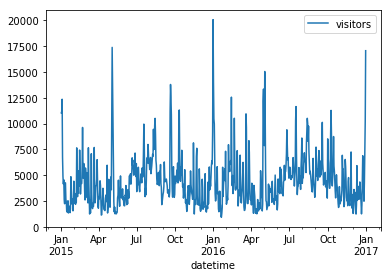

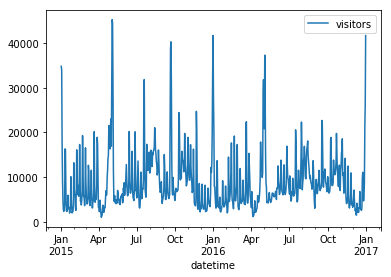

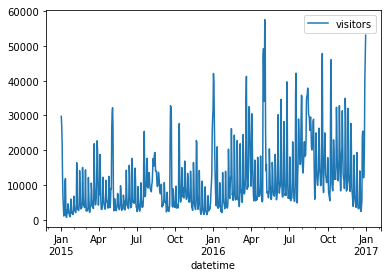

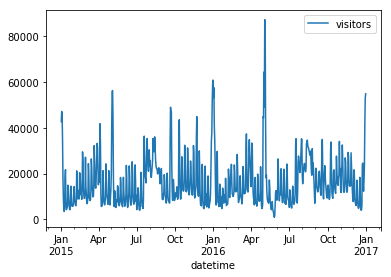

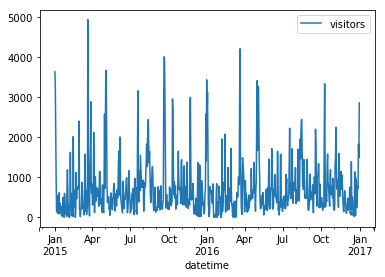

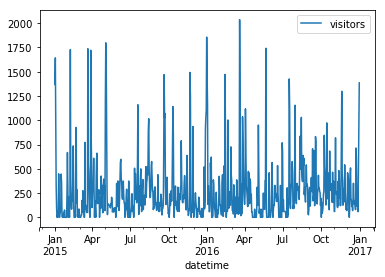

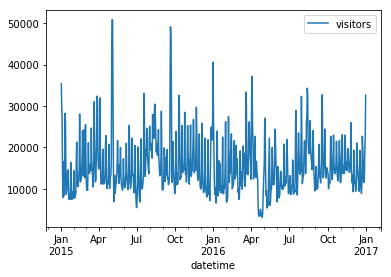

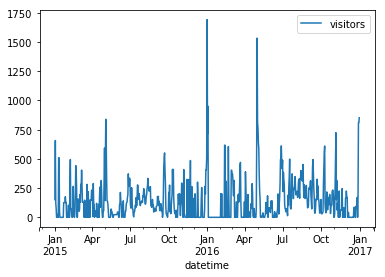

In [25]:
train_df.loc[:,'datetime'] = pd.to_datetime(train_df['datetime'])
parks = train_df['park'].unique().tolist()

for park in parks:
    print(park)
    train_df[train_df['park']==park].plot.line(x='datetime', y='visitors')

In [11]:
train_df['park'].value_counts()

日光国立公園        731
阿寒摩周国立公園      731
慶良間諸島国立公園     731
阿蘇くじゅう国立公園    731
大山隠岐国立公園      731
霧島錦江湾国立公園     731
伊勢志摩国立公園      731
十和田八幡平国立公園    731
Name: park, dtype: int64

In [12]:
test_df['park'].value_counts()

日光国立公園        365
大山隠岐国立公園      365
阿寒摩周国立公園      365
慶良間諸島国立公園     365
霧島錦江湾国立公園     365
阿蘇くじゅう国立公園    365
伊勢志摩国立公園      365
十和田八幡平国立公園    365
Name: park, dtype: int64

In [14]:
colopl['count'].replace('1-9', 5).astype(int)

0        5
1        5
2        5
3        5
4       19
5        5
6       12
7        5
8        5
9        5
10       5
11       5
12       5
13       5
14       5
15       5
16       5
17       5
18       5
19       5
20       5
21      17
22       5
23       5
24       5
25       5
26       5
27       5
28       5
29      59
        ..
1671     5
1672     5
1673     5
1674     5
1675     5
1676     5
1677     5
1678     5
1679     5
1680     5
1681     5
1682     5
1683    53
1684     5
1685     5
1686     5
1687    13
1688     5
1689     5
1690     5
1691     5
1692     5
1693     5
1694     5
1695     5
1696     5
1697    10
1698     5
1699     5
1700     5
Name: count, Length: 1701, dtype: int64

In [13]:
colopl

,year,month,park,country_jp,count
0,2016,1,阿寒摩周国立公園,アメリカ合衆国,1-9
1,2016,1,阿寒摩周国立公園,シンガポール,1-9
2,2016,1,阿寒摩周国立公園,マレーシア,1-9
3,2016,1,阿寒摩周国立公園,中国,1-9
4,2016,1,阿寒摩周国立公園,台湾,19
5,2016,1,阿寒摩周国立公園,朝鮮、南部,1-9
6,2016,1,阿寒摩周国立公園,香港(PRC),12
7,2016,1,十和田八幡平国立公園,アメリカ合衆国,1-9
8,2016,1,十和田八幡平国立公園,オーストラリア,1-9
9,2016,1,十和田八幡平国立公園,ノルウェー,1-9


In [14]:
nightley.loc[:,'datetime'] = pd.to_datetime(nightley['datetime'])

In [15]:
#testのtargetをnanにしときます
test_df['visitors'] = np.nan

# merge
df = train_df.append(test_df[['datetime', 'park', 'visitors']]).reset_index()

In [16]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [33]:
pd.merge(df, nightley, on='datetime', how='outer')
#df = df.join(nightley, how='left', on='datetime')

,index,datetime,park,visitors,Japan_count,Foreign_count
0,0,2015-01-01,阿寒摩周国立公園,11028.0,NaN,NaN
1,1,2015-01-01,十和田八幡平国立公園,34757.0,NaN,NaN
2,2,2015-01-01,日光国立公園,29714.0,NaN,NaN
3,3,2015-01-01,伊勢志摩国立公園,42652.0,NaN,NaN
4,4,2015-01-01,大山隠岐国立公園,3637.0,NaN,NaN
5,5,2015-01-01,阿蘇くじゅう国立公園,1369.0,NaN,NaN
6,6,2015-01-01,霧島錦江湾国立公園,35352.0,NaN,NaN
7,7,2015-01-01,慶良間諸島国立公園,151.0,NaN,NaN
8,8,2015-01-02,阿寒摩周国立公園,11153.0,NaN,NaN
9,9,2015-01-02,十和田八幡平国立公園,33795.0,NaN,NaN


In [31]:
df

,index,datetime,park,visitors
0,0,2015-01-01,阿寒摩周国立公園,11028.0
1,1,2015-01-01,十和田八幡平国立公園,34757.0
2,2,2015-01-01,日光国立公園,29714.0
3,3,2015-01-01,伊勢志摩国立公園,42652.0
4,4,2015-01-01,大山隠岐国立公園,3637.0
5,5,2015-01-01,阿蘇くじゅう国立公園,1369.0
6,6,2015-01-01,霧島錦江湾国立公園,35352.0
7,7,2015-01-01,慶良間諸島国立公園,151.0
8,8,2015-01-02,阿寒摩周国立公園,11153.0
9,9,2015-01-02,十和田八幡平国立公園,33795.0


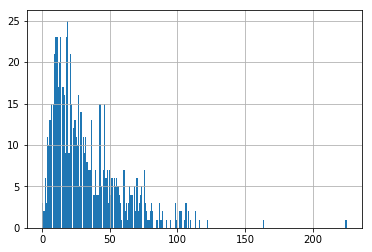

In [26]:
nightley.Japan_count.hist(bins=255)

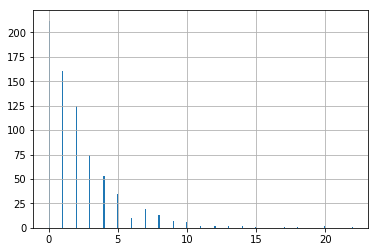

In [27]:
nightley.Foreign_count.hist(bins=255)

In [28]:
nightley.Foreign_count / nightley.Japan_count

0      0.000000
1      0.015152
2      0.080000
3      0.020000
4      0.000000
5      0.068966
6      0.142857
7      0.111111
8      0.046512
9      0.029412
10     0.054054
11     0.052632
12     0.083333
13     0.000000
14     0.000000
15     0.000000
16     0.045455
17     0.250000
18     0.000000
19     0.000000
20     0.000000
21     0.538462
22     0.031250
23     0.078431
24     0.500000
25     0.000000
26     0.000000
27     0.250000
28     0.611111
29     0.122449
         ...   
700    0.214286
701    0.000000
702    0.013158
703    0.166667
704    0.111111
705    0.111111
706    0.000000
707    0.000000
708    0.017857
709    0.042857
710    0.000000
711    0.555556
712    0.200000
713    0.250000
714    0.230769
715    0.000000
716    0.128205
717    0.080000
718    0.200000
719    0.100000
720    0.200000
721    0.095238
722    0.022989
723    0.108696
724    0.214286
725    0.062500
726    0.105263
727    0.181818
728    0.088889
729    0.000000
Length: 730, dtype: floa

In [34]:
hotlink.keyword.value_counts()

小松地獄          3285
ダイセンキャラボク     3285
阿寒摩周国立公園      3285
東照宮           3285
中禅寺湖          3285
コマクサ          3285
雌阿寒岳          3285
慶良間諸島国立公園     3285
双湖台           3285
オンネトー         3285
オキサンショウウオ     3285
八甲田山          3285
出雲大社          3285
屈斜路湖          3285
阿蘇くじゅう国立公園    3285
鶴見岳           3285
アカウミガメ        3285
リアス海岸         3285
華厳の滝          3285
ミヤマキリシマ       3285
日光国立公園        3285
十和田八幡平国立公園    3285
隠岐自然回帰の森      3285
岩手山           3285
鬼怒川           3285
あか牛           3285
モリアオガエル       3285
霧島錦江湾国立公園     3285
国立公園          3285
大山隠岐国立公園      3285
アオウミガメ        3285
ノカイドウ         3285
伊勢神宮          3285
ザトウクジラ        3285
栗野八幡地獄        3285
阿波連岬園地        3285
稲崎園地          3285
奥入瀬渓流         3285
ハマユウ          3285
日光の社寺         3285
開聞岳           3285
キスミレ          3285
浄土ヶ浦          3285
伊勢志摩国立公園      3285
Name: keyword, dtype: int64